In [2]:
%matplotlib inline

import pickle as pkl
from fragments.params import ParamStorage
from fragments.strategy import ConditionalStrategy, CrossoverStrategy, InvertingStrategy, Strategy
from fragments.indicators import RSI, SMA, Indicator
from fragments.optim import optimize
from fragments.stats import equity, sqn, plot

In [3]:
with open("../data/BTCUSDT.pkl", "rb") as f:
    ohlcv_list = pkl.load(f)
Indicator.enable_precalculation(ohlcv_list)
Strategy.set_fee(0.022)

In [4]:
param_storage = ParamStorage()

strategies = list()
strategies.append(CrossoverStrategy(SMA(param_storage), SMA(param_storage), param_storage))

results = optimize(strategies[-1], equity, ohlcv_list, random_state=42, verbose=True, initial_point_generator="sobol")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.8220
Function value obtained: -0.0100
Current minimum: -0.0100
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.1740
Function value obtained: -0.0100
Current minimum: -0.0100
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 6.4960
Function value obtained: -0.0100
Current minimum: -0.0100
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 8.4260
Function value obtained: -0.0100
Current minimum: -0.0100
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 8.7140
Function value obtained: -96.0524
Current minimum: -96.0524
Iteration No: 6 started

In [26]:
# SAVE

with open("crypto.pkl", "wb") as f:
    pkl.dump(strategies, f)

In [16]:
# LOAD

with open("crypto.pkl", "rb") as f:
    strategies = pkl.load(f)

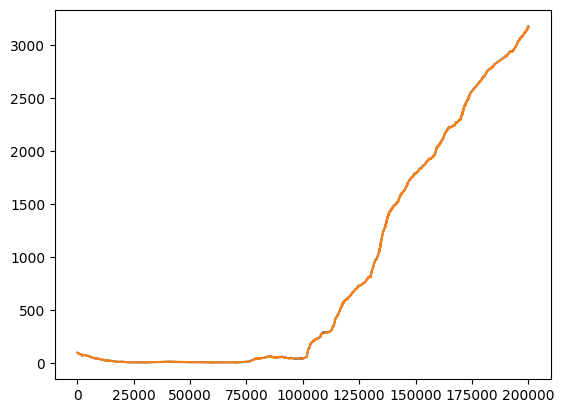

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(strategies[-1].hist_equity)[:200000])
plt.plot(np.array(strategies[-2].hist_equity)[:200000])
# plt.plot(np.array(strategies[-3].hist_equity)[:200000])

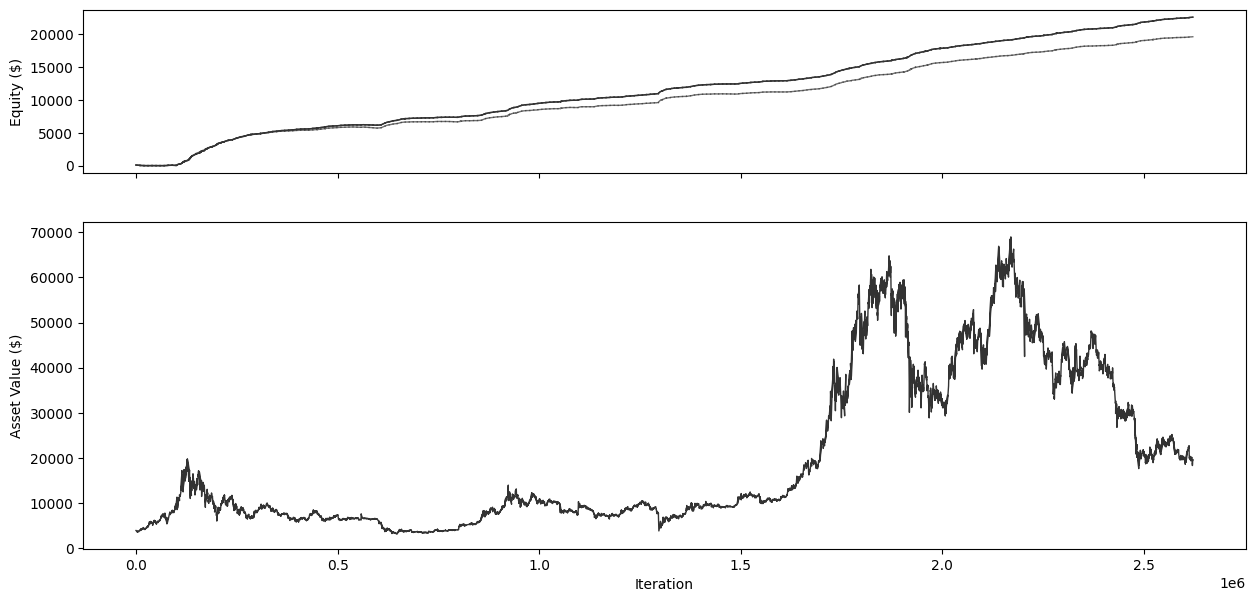

In [32]:
plot(strategies[-1], ohlcv_list)

In [28]:
param_storage_2 = ParamStorage()
strategies.append(ConditionalStrategy(RSI(param_storage_2), param_storage_2, previous=strategies[-1]))

In [31]:
results = optimize(strategies[-1], equity, ohlcv_list, random_state=42, verbose=True, initial_point_generator="sobol")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 40.5060
Function value obtained: -566.1541
Current minimum: -566.1541
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 38.5240
Function value obtained: -0.0000
Current minimum: -566.1541
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 42.6590
Function value obtained: -3658.8625
Current minimum: -3658.8625
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 42.1020
Function value obtained: -22555.8654
Current minimum: -22555.8654
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 38.0290
Function value obtained: -100.0000
Current minimum: -22555

In [33]:
param_storage_2.cells

[ParamCell(bounds=(2, 20), value=8),
 ParamCell(bounds=[<ActionLogic.AND: 1>, <ActionLogic.OR: 2>, <ActionLogic.IGNORE: 3>], value=2),
 ParamCell(bounds=(0, 100), value=9),
 ParamCell(bounds=[<ConditionType.LESS_THAN: 1>, <ConditionType.MORE_THAN: 2>], value=1),
 ParamCell(bounds=[<Action.BUY: 1>, <Action.SELL: 2>, <Action.CANCEL: 3>, <Action.PASS: 4>], value=1)]